In [4]:
pip install pandas-datareader

     ------------------------------------ 109.5/109.5 KB 910.3 kB/s eta 0:00:00
     ---------------------------------------- 3.8/3.8 MB 10.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [6]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [8]:
import pandas_datareader as pdr
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Загрузка данных акций IBM с использованием Stooq
stock_data = pdr.DataReader('IBM', 'stooq')

# Рассмотрим цену закрытия
closing_prices = stock_data['Close']

# Параметры для "Плавающего окна"
window_size = 5
forecast_days = 1

# Подготовка данных
X, y = [], []
for i in range(len(closing_prices) - window_size - forecast_days + 1):
    window_data = closing_prices.iloc[i:i + window_size].values
    target_data = closing_prices.iloc[i + window_size:i + window_size + forecast_days].values
    X.append(window_data)
    y.extend(target_data)

X, y = np.array(X), np.array(y)

# Разделение данных на обучающую и тестовую выборки
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Прогнозирование
predictions = model.predict(X_test)

# Результаты можно анализировать с использованием различных метрик или визуализировать
print(predictions)

[112.52604312 111.83387395 115.66700439 114.582728   115.96037065
 119.24779763 117.41896878 118.35437643 118.51364219 123.85789819
 126.59768994 124.87744035 125.72385063 126.86755981 127.41045923
 126.53714402 126.16237396 126.50808977 126.02748809 125.93363314
 125.90831677 120.61222535 120.60702027 120.69003739 120.36879369
 118.92609186 118.26183293 117.35576945 118.36476222 119.09889552
 119.24764254 118.09080642 117.77221475 116.19694275 116.64374977
 116.71988951 116.59940192 117.31834278 117.28217782 116.96391452
 115.50549597 114.87132655 113.74503766 113.90653362 114.4184305
 113.73786508 114.50833823 113.61415057 112.38769802 111.42097298
 110.87026517 111.83761671 108.36614126 107.02000315 109.14086038
 109.56035357 110.01605345 111.44363213 111.67444208 114.78667279
 115.04324695 113.90782746 113.083101   114.43867426 113.38597903
 112.36860815 110.76463599 113.92596278 114.19844273 114.93724888
 114.57494357 116.79474938 116.82213092 116.23320997 116.90507307
 116.816845

Визуализация фактических и прогнозируемых данных

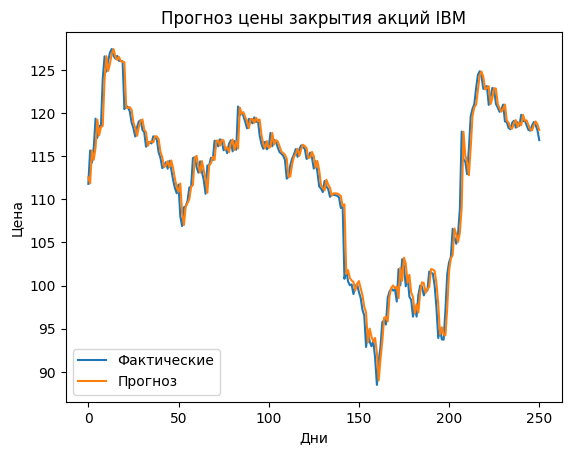

In [9]:

plt.plot(y_test, label='Фактические')
plt.plot(predictions, label='Прогноз')
plt.legend()
plt.title('Прогноз цены закрытия акций IBM')
plt.xlabel('Дни')
plt.ylabel('Цена')
plt.show()

Оценка модели

In [10]:
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print('Среднеквадратичная ошибка:', mse)
print('Средняя абсолютная ошибка:', mae)
print('Коэффициент детерминации R^2:', r2)


Среднеквадратичная ошибка: 2.7558560978224476
Средняя абсолютная ошибка: 1.139419724285671
Коэффициент детерминации R^2: 0.9658675295328933
